[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

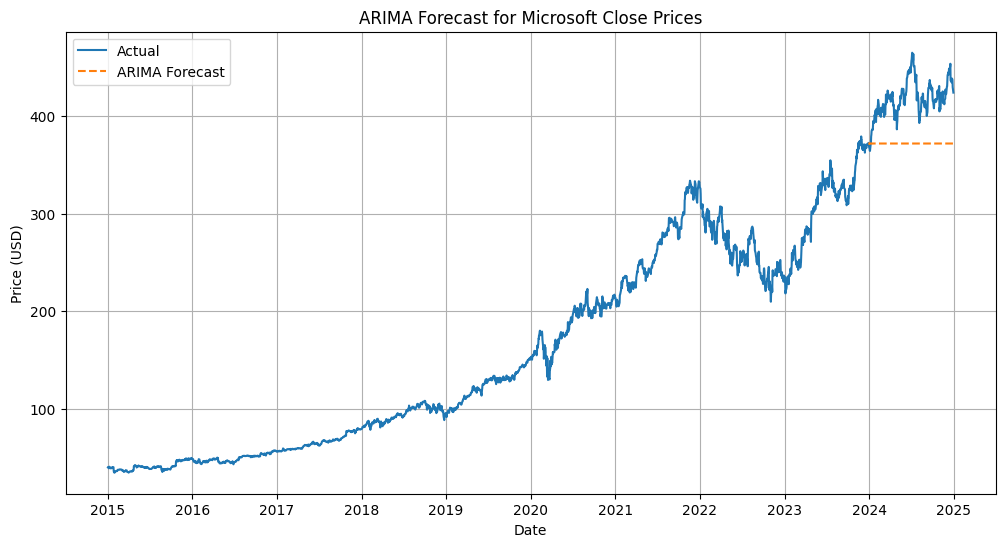

In [3]:
# Install dependencies
!pip install yfinance statsmodels matplotlib pandas --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Step 1: Load Microsoft stock data (Close price)
msft = yf.download("MSFT", start="2015-01-01", end="2024-12-31")
data = msft[['Close']].dropna()

# Step 2: Train-test split
train_size = int(len(data) * 0.9)
train, test = data[:train_size], data[train_size:]

# Step 3: Fit ARIMA model (order can be tuned)
model = ARIMA(train['Close'], order=(5,1,2))  # (p,d,q)
model_fit = model.fit()

# Step 4: Forecast
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Step 5: Plot
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(test.index, forecast, label='ARIMA Forecast', linestyle='dashed')
plt.title("ARIMA Forecast for Microsoft Close Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
